# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home. 

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

In [1]:
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Setup

In [192]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [193]:
# TODO: Load the dataset for training
train_df = pd.read_json("Data/output.json")
train_df

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48
...,...,...,...,...,...,...,...,...,...
17989,59,0,35.950,51.225,35.875,51.125,2024-01-30 06:41:00,2024-01-30 07:07:00,10.92
17990,59,0,35.875,51.125,35.690,51.295,2024-01-30 12:46:00,2024-01-30 13:35:00,17.35
17991,59,0,35.875,51.125,35.525,51.100,2024-01-30 17:39:00,2024-01-30 18:48:00,34.56
17992,59,0,35.525,51.100,35.815,51.320,2024-01-30 20:09:00,2024-01-30 21:19:00,36.80


In [194]:
# TODO: Load the dataset for testing
test_df = pd.read_json("Data/output_test.json")
test_df

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08
...,...,...,...,...,...,...,...,...,...
4494,32,3,35.775,51.400,35.875,51.250,2024-01-30 07:11:00,2024-01-30 07:51:00,27.15
4495,36,1,35.625,51.125,35.735,51.200,2024-01-30 17:08:00,2024-01-30 17:38:00,10.78
4496,40,2,36.000,51.085,35.545,51.145,2024-01-30 22:13:00,2024-01-30 23:43:00,43.47
4497,19,3,35.875,51.125,35.840,51.130,2024-01-30 17:33:00,2024-01-30 18:03:00,19.37


In [195]:
# print out the number of unique users and also randomly select one user
unique_users = train_df['user_id'].nunique()
random_user = np.random.choice(train_df['user_id'].unique())

print((unique_users, random_user))


(60, 8)


In [196]:
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
# from google.colab import output
# output.enable_custom_widget_manager()

In [197]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data

random_user_df = train_df.loc[train_df['user_id'] == random_user][['dest lat', 'dest lon']]
random_user_df

,dest lat,dest lon
2088,35.505,51.180
2089,35.625,51.125
2090,35.785,51.315
2091,35.700,51.210
2092,35.625,51.125
...,...,...
2406,35.625,51.125
2407,35.565,51.060
2408,35.625,51.125
2409,35.750,51.385


In [198]:
map_random_user = KeplerGl()
map_random_user.add_data(data=random_user_df, name='random_user_destinations')
map_random_user.save_to_html(file_name='random_user_destinations_map.html')
map_random_user


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to random_user_destinations_map.html!


KeplerGl(data={'random_user_destinations': {'index': [2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 20…

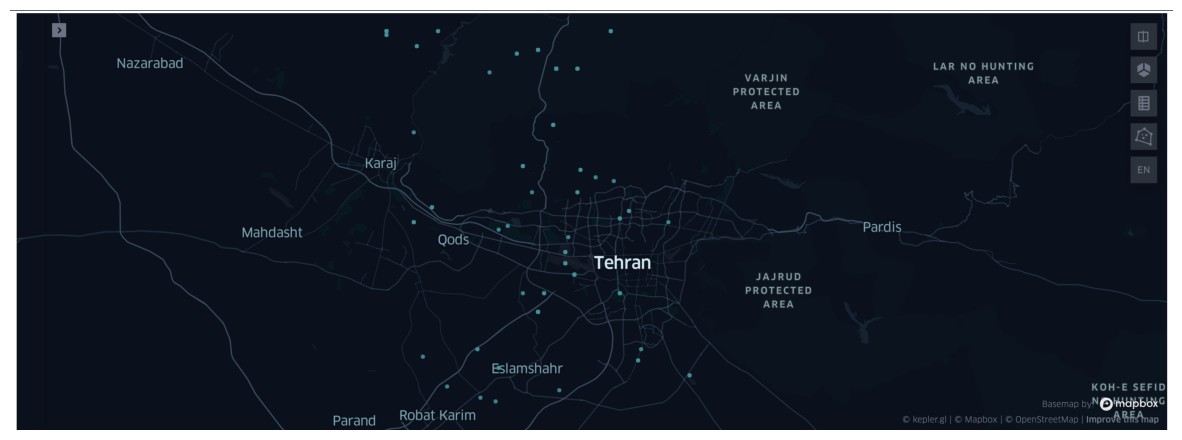

In [9]:
# Sample output:

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [199]:


x_train = train_df[['user_id', 'Day', 'origin lat', 'origin lon', 'start_time', 'end_time']]
y_train = train_df[['dest lat', 'dest lon']]

x_train['weekend'] = x_train['Day'].apply(lambda x: 0 if x >= 0 and x <= 4 else 1)

x_train['start_hour'] = x_train['start_time'].dt.hour
x_train['end_hour'] = x_train['end_time'].dt.hour
x_train['start_minute'] = x_train['start_time'].dt.minute
x_train['end_minute'] = x_train['end_time'].dt.minute

x_train['after_midnight'] = x_train['start_hour'].apply(lambda x: 1 if x >= 0 and x <= 6 else 0)
x_train['morning'] = x_train['start_hour'].apply(lambda x: 1 if x >= 7 and x <= 11 else 0)
x_train['noon'] = x_train['start_hour'].apply(lambda x: 1 if x >= 12 and x <= 3 else 0)
x_train['afternoon'] = x_train['start_hour'].apply(lambda x: 1 if x >= 4 and x <= 7 else 0)
x_train['night'] = x_train['start_hour'].apply(lambda x: 1 if x >= 8 and x <= 12 else 0) 

x_train['short_travel'] = (x_train['end_hour'] - x_train['start_hour'] < 1).astype(int)

x_train = x_train.drop(columns=['start_time', 'end_time'])

x_train

/var/folders/w_/ktm169bx72l270xpfjd5sljh0000gn/T/ipykernel_22239/2650918399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['weekend'] = x_train['Day'].apply(lambda x: 0 if x >= 0 and x <= 4 else 1)
/var/folders/w_/ktm169bx72l270xpfjd5sljh0000gn/T/ipykernel_22239/2650918399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['start_hour'] = x_train['start_time'].dt.hour


,user_id,Day,origin lat,origin lon,weekend,start_hour,end_hour,start_minute,end_minute,after_midnight,morning,noon,afternoon,night,short_travel
0,0,0,35.625,51.375,0,13,14,7,43,0,0,0,0,0,0
1,0,0,36.000,51.085,0,15,16,13,49,0,0,0,0,0,0
2,0,0,35.680,51.445,0,20,20,41,54,0,0,0,0,0,1
3,0,0,35.745,51.465,0,21,21,24,37,0,0,0,0,0,1
4,0,1,35.625,51.375,0,23,23,38,58,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17989,59,0,35.950,51.225,0,6,7,41,7,1,0,0,1,0,0
17990,59,0,35.875,51.125,0,12,13,46,35,0,0,0,0,1,0
17991,59,0,35.875,51.125,0,17,18,39,48,0,0,0,0,0,0
17992,59,0,35.525,51.100,0,20,21,9,19,0,0,0,0,0,0


In [200]:
print(x_train['short_travel'].sum())
print(x_train['weekend'].sum())

7889
3653


In [201]:
x_test = test_df[['user_id', 'Day', 'origin lat', 'origin lon', 'start_time', 'end_time']]
y_test = test_df[['dest lat', 'dest lon']]

x_test['weekend'] = x_test['Day'].apply(lambda x: 0 if x >= 0 and x <= 4 else 1)

x_test['start_hour'] = x_test['start_time'].dt.hour
x_test['end_hour'] = x_test['end_time'].dt.hour
x_test['start_minute'] = x_test['start_time'].dt.minute
x_test['end_minute'] = x_test['end_time'].dt.minute


x_test['after_midnight'] = x_test['start_hour'].apply(lambda x: 1 if x >= 0 and x <= 6 else 0)
x_test['morning'] = x_test['start_hour'].apply(lambda x: 1 if x >= 7 and x <= 11 else 0)
x_test['noon'] = x_test['start_hour'].apply(lambda x: 1 if x >= 12 and x <= 3 else 0)
x_test['afternoon'] = x_test['start_hour'].apply(lambda x: 1 if x >= 4 and x <= 7 else 0)
x_test['night'] = x_test['start_hour'].apply(lambda x: 1 if x >= 8 and x <= 12 else 0) 

x_test['short_travel'] = (x_test['end_hour'] - x_test['start_hour'] < 1).astype(int)

x_test = x_test.drop(columns=['start_time', 'end_time'])

x_test

/var/folders/w_/ktm169bx72l270xpfjd5sljh0000gn/T/ipykernel_22239/2749844080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['weekend'] = x_test['Day'].apply(lambda x: 0 if x >= 0 and x <= 4 else 1)
/var/folders/w_/ktm169bx72l270xpfjd5sljh0000gn/T/ipykernel_22239/2749844080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['start_hour'] = x_test['start_time'].dt.hour


,user_id,Day,origin lat,origin lon,weekend,start_hour,end_hour,start_minute,end_minute,after_midnight,morning,noon,afternoon,night,short_travel
0,24,6,35.650,51.225,1,11,12,58,12,0,1,0,0,1,0
1,46,2,35.625,51.250,0,21,22,58,18,0,0,0,0,0,0
2,27,5,35.650,51.225,1,20,20,5,58,0,0,0,0,0,1
3,7,4,35.875,51.375,0,17,18,39,17,0,0,0,0,0,0
4,27,3,35.625,51.375,0,13,13,16,19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,32,3,35.775,51.400,0,7,7,11,51,0,1,0,1,0,1
4495,36,1,35.625,51.125,0,17,17,8,38,0,0,0,0,0,1
4496,40,2,36.000,51.085,0,22,23,13,43,0,0,0,0,0,0
4497,19,3,35.875,51.125,0,17,18,33,3,0,0,0,0,0,0


In [202]:
print(x_test['short_travel'].sum())
print(x_test['weekend'].sum())

2028
885


In [203]:
# print out the shape of the train and test dataframes
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

((17994, 15), (17994, 2), (4499, 15), (4499, 2))


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [204]:
# Define the model
# TODO: You can change the signature of functions and also add any function you need

class NearestNeighbor():
    def __init__(self, k):
        self.k = k
        self.X = None
        self.Y = None
        self.org_Y = None
        self.X_mean = 0
        self.X_std = 0

    def fit(self, x_train, y_train):
        self.org_Y = y_train
        # self.X_mean = np.mean(x_train, axis=0)
        # self.X_std = np.std(x_train, axis=0)
        # print(self.X_std)
        # self.X = (x_train - self.X_mean) / (self.X_std)
        self.X = x_train
        # print(x_train[2] - self.X_mean)
        # print(self.X[2])
        # self.Y = (y_train - np.mean(y_train, axis=0)) / np.std(y_train, axis=0)

    def predict(self, x):
        # print(x)
        # normalized_x = (x - self.X_mean) / (self.X_std)
        normalized_x = x
        distances = np.sqrt(np.sum((self.X - normalized_x)**2, axis=1))
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.org_Y[k_indices]
        prediction = np.mean(k_nearest_labels, axis=0)
        return prediction



In [205]:
# Fit the model on training data
knn_model = NearestNeighbor(1)
knn_model.fit(x_train.to_numpy(), y_train.to_numpy())

In [206]:
# Calculate the accuracy on training data
different = 0
for index, row in x_train.iterrows():
  predicted_lat, predicted_lon = knn_model.predict(row.to_frame().T.to_numpy()[0])
  real_lat = y_train.iloc[index].to_frame().T['dest lat'].values[0]
  real_lon = y_train.iloc[index].to_frame().T['dest lon'].values[0]
  if predicted_lat != real_lat or predicted_lon != real_lon:
    different += 1
print((1 - different/len(x_train))*1e2)

99.98332777592532


In [207]:
# Calculate the accuracy on test data
different = 0
for index, row in x_test.iterrows():
  predicted_lat, predicted_lon = knn_model.predict(row.to_frame().T.to_numpy()[0])
  real_lat = y_test.iloc[index].to_frame().T['dest lat'].values[0]
  real_lon = y_test.iloc[index].to_frame().T['dest lon'].values[0]
  if predicted_lat != real_lat or predicted_lon != real_lon:
    different += 1
print((1 - different/len(x_test))*1e2)

30.362302733940872


**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...
این مدل مناسب نیست. به این دلیل که تنها با توجه به مختصات هایی که درون داده های ترین وجود دارد سعی میکند یک پیش بینی انجام دهد. یعنی مدل پیش بینی آن گسسته است و محدود است به داده های ترینی که داشته. چک میکند که کدام داده های ترین به داده مورد نظرش نزدیک تر است و بین آن ها میانگین میگیرد و یک جواب حدودی برای مختصات بدست می آورد. در حالی که مختصات یک داده پیوسته است. مدل باید بتواند یک حدود و مجموعه از نقاط برای هر ایکس پیدا کند ولی از طرفی برای اینکار به یک حد و نیاز داریم ولی از طرفی چون با فضای مختصاتی سرو کار داریم هر تغییر کوچکی میتواند مدل را خراب کند و هر تغییر کوچک میتواند اثر بزرگی در مختصات داشته باشد. همچنین با افزایش پیچدگی داده ها و افزایش فیچر ها ممکن است مدل جواب های پرتی بدهد. این مدل به دلیل سادگی اش مدل خوبی است که در ابتدا ممکن است به ذهن برسد ولی در صورت پیچیده تر شدن داده ها و افزایش فیچر ها همانطور که مشاهده شد دقت پایینی بدست می آورد.

# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [114]:
%pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 873.8 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [221]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Defining the model
# TODO: You can change the signature of functions and also add any function you need
class Encoder():
    def __init__(self):
      self.transform_lat_lon={}
      self.invtrans_lat_lon={}
      self.number=0

    def fit(self, y):
      y_numpy = y.to_numpy()
      for i in range(len(y_numpy)):
        if (y_numpy[i][0] , y_numpy[i][1]) not in self.transform_lat_lon:
          self.transform_lat_lon[(y_numpy[i][0] , y_numpy[i][1])]= self.number
          self.invtrans_lat_lon[self.number]= y_numpy[i]
          self.number+=1
      return self.transform(y_numpy)

    def transform(self, y):
      transformed_y = []
      for i in range(len(y)):
        transformed_y.append(self.transform_lat_lon[(y[i][0] , y[i][1])])
      return transformed_y

    def inverse_transform(self, enc):
      transfomed_enc= []
      for i in range(len(enc)):
        transfomed_enc.append(self.invtrans_lat_lon[enc[i]])

      return np.array(transfomed_enc)

In [222]:
# TODO: fit the Encoder on training data
encoder = Encoder()
y_train_xgb = encoder.fit(y_train)
x_train_xgb = np.array(x_train.to_numpy(),dtype=np.float64)

In [223]:
# TODO: transform the training and test data
# and fit the model on training data
classifier = xgb.XGBClassifier()
classifier.fit(x_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [224]:
# TODO: print out train-data accuracy
prediction = classifier.predict(x_train_xgb)
predicted_y = encoder.inverse_transform(prediction)
different = 0
for index, row in x_train.iterrows():
  real_lat = y_train.iloc[index].to_frame().T['dest lat'].values[0]
  real_lon = y_train.iloc[index].to_frame().T['dest lon'].values[0]
  if predicted_y[index][0] != real_lat or predicted_y[index][1] != real_lon:
    different += 1
print((1 - different/len(x_test))*1e2)


99.71104689931096


In [225]:
# TODO: print out test-data accuracy
x_test_xgb = np.array(x_test.to_numpy(),dtype=np.float64)
prediction = classifier.predict(x_test_xgb)
predicted_y = encoder.inverse_transform(prediction)
different = 0
for index, row in x_test.iterrows():
  real_lat = y_test.iloc[index].to_frame().T['dest lat'].values[0]
  real_lon = y_test.iloc[index].to_frame().T['dest lon'].values[0]
  if predicted_y[index][0] != real_lat or predicted_y[index][1] != real_lon:
    different += 1
print((1 - different/len(x_test))*1e2)


70.17114914425429


**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...
بله. این روش روش بسیاری مناسبی برای این جور مسائل است و همانطور که مشاهده شد دقت بالایی هم به ما میدهد. این روش نسبت به افزایش پارامترها و همچنین اورفیت شدن نیز تا حد خوبی مقاوم است. و با مدل های پیچیده تر نیز خوب کار میکند. 

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

Your Answer: ...

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [226]:
# load the training dataset
train_df = pd.read_json("Data/trip_data.json")
train_df

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-30 23:38:00,2024-01-30 23:58:00,19.48
...,...,...,...,...,...,...,...
17989,59,0,"[home, [35.95, 51.225]]","[work, [35.875, 51.125]]",2024-01-30 06:41:00,2024-01-30 07:07:00,10.92
17990,59,0,"[work, [35.875, 51.125]]","[restaurant, [35.69, 51.295]]",2024-01-30 12:46:00,2024-01-30 13:35:00,17.35
17991,59,0,"[work, [35.875, 51.125]]","[pool, [35.525, 51.1]]",2024-01-30 17:39:00,2024-01-30 18:48:00,34.56
17992,59,0,"[pool, [35.525, 51.1]]","[restaurant, [35.815, 51.32]]",2024-01-30 20:09:00,2024-01-30 21:19:00,36.80


In [227]:
# load the test dataset
test_df = pd.read_json("Data/trip_data_test.json")
test_df

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-30 13:16:00,2024-01-30 13:19:00,15.08
...,...,...,...,...,...,...,...
4494,32,3,"[home, [35.775, 51.4]]","[university, [35.875, 51.25]]",2024-01-30 07:11:00,2024-01-30 07:51:00,27.15
4495,36,1,"[work, [35.625, 51.125]]","[home, [35.735, 51.2]]",2024-01-30 17:08:00,2024-01-30 17:38:00,10.78
4496,40,2,"[restaurant, [36.0, 51.085]]","[home, [35.545, 51.145]]",2024-01-30 22:13:00,2024-01-30 23:43:00,43.47
4497,19,3,"[work, [35.875, 51.125]]","[home, [35.84, 51.13]]",2024-01-30 17:33:00,2024-01-30 18:03:00,19.37


In [228]:
# Extract features and do preprocessing if needed

train_df['weekend'] = train_df['Day'].apply(lambda x: 0 if x >= 0 and x <= 4 else 1)

train_df['start_hour'] = train_df['start_time'].dt.hour
train_df['end_hour'] = train_df['end_time'].dt.hour
train_df['start_minute'] = train_df['start_time'].dt.minute
train_df['end_minute'] = train_df['end_time'].dt.minute

train_df['short_travel'] = (train_df['end_hour'] - train_df['start_hour'] < 1).astype(int)
train_df['origin lat'] = train_df['origin'].apply(lambda x: x[1][0])
train_df['origin lon'] = train_df['origin'].apply(lambda x: x[1][1])
train_df['destination lat'] = train_df['destination'].apply(lambda x: x[1][0])
train_df['destination lon'] = train_df['destination'].apply(lambda x: x[1][1])
train_df['origin label'] = train_df['origin'].apply(lambda x: x[0] + '-' + str(x[1][0]) + '-' + str(x[1][1]))
train_df['destination label'] = train_df['destination'].apply(lambda x: x[0] + '-' + str(x[1][0]) + '-' + str(x[1][1]))


train_df = train_df.drop(columns=['start_time', 'end_time', 'origin', 'destination'])

train_df

,user_id,Day,price,weekend,start_hour,end_hour,start_minute,end_minute,short_travel,origin lat,origin lon,destination lat,destination lon,origin label,destination label
0,0,0,43.99,0,13,14,7,43,0,35.625,51.375,36.000,51.085,work-35.625-51.375,restaurant-36.0-51.085
1,0,0,36.66,0,15,16,13,49,0,36.000,51.085,35.625,51.375,restaurant-36.0-51.085,work-35.625-51.375
2,0,0,15.08,0,20,20,41,54,1,35.680,51.445,35.745,51.465,home-35.68-51.445,restaurant-35.745-51.465
3,0,0,10.00,0,21,21,24,37,1,35.745,51.465,35.680,51.445,restaurant-35.745-51.465,home-35.68-51.445
4,0,1,19.48,0,23,23,38,58,1,35.625,51.375,35.680,51.445,work-35.625-51.375,home-35.68-51.445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17989,59,0,10.92,0,6,7,41,7,0,35.950,51.225,35.875,51.125,home-35.95-51.225,work-35.875-51.125
17990,59,0,17.35,0,12,13,46,35,0,35.875,51.125,35.690,51.295,work-35.875-51.125,restaurant-35.69-51.295
17991,59,0,34.56,0,17,18,39,48,0,35.875,51.125,35.525,51.100,work-35.875-51.125,pool-35.525-51.1
17992,59,0,36.80,0,20,21,9,19,0,35.525,51.100,35.815,51.320,pool-35.525-51.1,restaurant-35.815-51.32


In [229]:
# Extract features and do preprocessing if needed
test_df['weekend'] = test_df['Day'].apply(lambda x: 0 if x >= 0 and x <= 4 else 1)

test_df['start_hour'] = test_df['start_time'].dt.hour
test_df['end_hour'] = test_df['end_time'].dt.hour
test_df['start_minute'] = test_df['start_time'].dt.minute
test_df['end_minute'] = test_df['end_time'].dt.minute

test_df['short_travel'] = (test_df['end_hour'] - test_df['start_hour'] < 1).astype(int)
test_df['origin lat'] = test_df['origin'].apply(lambda x: x[1][0])
test_df['origin lon'] = test_df['origin'].apply(lambda x: x[1][1])
test_df['destination lat'] = test_df['destination'].apply(lambda x: x[1][0])
test_df['destination lon'] = test_df['destination'].apply(lambda x: x[1][1])
test_df['origin label'] = test_df['origin'].apply(lambda x: x[0] + '-' + str(x[1][0]) + '-' + str(x[1][1]))
test_df['destination label'] = test_df['destination'].apply(lambda x: x[0] + '-' + str(x[1][0]) + '-' + str(x[1][1]))


test_df = test_df.drop(columns=['start_time', 'end_time', 'origin', 'destination'])

test_df

,user_id,Day,price,weekend,start_hour,end_hour,start_minute,end_minute,short_travel,origin lat,origin lon,destination lat,destination lon,origin label,destination label
0,24,6,10.00,1,11,12,58,12,0,35.650,51.225,35.640,51.270,pool-35.65-51.225,home-35.64-51.27
1,46,2,11.84,0,21,22,58,18,0,35.625,51.250,35.690,51.295,university-35.625-51.25,restaurant-35.69-51.295
2,27,5,23.36,1,20,20,5,58,1,35.650,51.225,35.865,51.045,pool-35.65-51.225,restaurant-35.865-51.045
3,7,4,13.74,0,17,18,39,17,0,35.875,51.375,35.890,51.315,work-35.875-51.375,home-35.89-51.315
4,27,3,15.08,0,13,13,16,19,1,35.625,51.375,35.650,51.385,work-35.625-51.375,restaurant-35.65-51.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,32,3,27.15,0,7,7,11,51,1,35.775,51.400,35.875,51.250,home-35.775-51.4,university-35.875-51.25
4495,36,1,10.78,0,17,17,8,38,1,35.625,51.125,35.735,51.200,work-35.625-51.125,home-35.735-51.2
4496,40,2,43.47,0,22,23,13,43,0,36.000,51.085,35.545,51.145,restaurant-36.0-51.085,home-35.545-51.145
4497,19,3,19.37,0,17,18,33,3,0,35.875,51.125,35.840,51.130,work-35.875-51.125,home-35.84-51.13


In [230]:
# print out the unique values for each column
for column in train_df.columns:
    unique_values = train_df[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print("========================")

Column: user_id
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Column: Day
[0 1 2 3 4 6 5]
Column: price
[43.99 36.66 15.08 ... 50.3  40.59 44.78]
Column: weekend
[0 1]
Column: start_hour
[13 15 20 21 23  7 14 22 12 17 16  8 11  9 10 18 19  6]
Column: end_hour
[14 16 20 21 23  8  7 13 22 12 18 15  9 17 10 11 19  6]
Column: start_minute
[ 7 13 41 24 38 59 19 55 11  8  3  0 50 23 40 28  1  5 54 29 44 36 49 21
 33 51 35 30 56 17  6 42 15 53 20 37 32 46 26 25 22  9 48 34  4 16 45 27
 12 31 57 52 18  2 47 10 43 58 14 39]
Column: end_minute
[43 49 54 37 58 19  9 33 25 20 53 29 50 31  4 24 14  1 39 51 44  8 46  7
  0  5 32 28 56 23 34 10 18 21 13 59 55 41 36 22 48  3 11 45 52 47 16  2
 57  6 27 42 26 12 15 17 40 30 38 35]
Column: short_travel
[0 1]
Column: origin lat
[35.625 36.    35.68  35.745 35.705 35.815 35.75  35.65  35.675 35.69
 35.785 35.995 35.875 

In [231]:
import pandas as pd

# print out the data type of each column
print(train_df.dtypes)

user_id                int64
Day                    int64
price                float64
weekend                int64
start_hour             int32
end_hour               int32
start_minute           int32
end_minute             int32
short_travel           int64
origin lat           float64
origin lon           float64
destination lat      float64
destination lon      float64
origin label          object
destination label     object
dtype: object


Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Finalize the data (do all preprocessing needed)
all_labels = pd.concat([train_df['origin label'], train_df['destination label']])
label_encoder_train = LabelEncoder()
label_encoder_train.fit(all_labels)
train_df['origin label'] = label_encoder_train.transform(train_df['origin label'])
train_df['destination label'] = label_encoder_train.transform(train_df['destination label'])


In [233]:
train_df

,user_id,Day,price,weekend,start_hour,end_hour,start_minute,end_minute,short_travel,origin lat,origin lon,destination lat,destination lon,origin label,destination label
0,0,0,43.99,0,13,14,7,43,0,35.625,51.375,36.000,51.085,108,103
1,0,0,36.66,0,15,16,13,49,0,36.000,51.085,35.625,51.375,103,108
2,0,0,15.08,0,20,20,41,54,1,35.680,51.445,35.745,51.465,22,83
3,0,0,10.00,0,21,21,24,37,1,35.745,51.465,35.680,51.445,83,22
4,0,1,19.48,0,23,23,38,58,1,35.625,51.375,35.680,51.445,108,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17989,59,0,10.92,0,6,7,41,7,0,35.950,51.225,35.875,51.125,52,109
17990,59,0,17.35,0,12,13,46,35,0,35.875,51.125,35.690,51.295,109,78
17991,59,0,34.56,0,17,18,39,48,0,35.875,51.125,35.525,51.100,109,60
17992,59,0,36.80,0,20,21,9,19,0,35.525,51.100,35.815,51.320,60,91


In [234]:
all_labels = pd.concat([test_df['origin label'], test_df['destination label']])
label_encoder_test = LabelEncoder()
label_encoder_test.fit(all_labels)
test_df['origin label'] = label_encoder_test.transform(test_df['origin label'])
test_df['destination label'] = label_encoder_test.transform(test_df['destination label'])
test_df

,user_id,Day,price,weekend,start_hour,end_hour,start_minute,end_minute,short_travel,origin lat,origin lon,destination lat,destination lon,origin label,destination label
0,24,6,10.00,1,11,12,58,12,0,35.650,51.225,35.640,51.270,62,19
1,46,2,11.84,0,21,22,58,18,0,35.625,51.250,35.690,51.295,105,78
2,27,5,23.36,1,20,20,5,58,1,35.650,51.225,35.865,51.045,62,93
3,7,4,13.74,0,17,18,39,17,0,35.875,51.375,35.890,51.315,110,44
4,27,3,15.08,0,13,13,16,19,1,35.625,51.375,35.650,51.385,108,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,32,3,27.15,0,7,7,11,51,1,35.775,51.400,35.875,51.250,31,106
4495,36,1,10.78,0,17,17,8,38,1,35.625,51.125,35.735,51.200,107,27
4496,40,2,43.47,0,22,23,13,43,0,36.000,51.085,35.545,51.145,103,11
4497,19,3,19.37,0,17,18,33,3,0,35.875,51.125,35.840,51.130,109,38


Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [235]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features.iloc[idx]
        label = self.labels.iloc[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
        
x_train = train_df[['user_id', 'Day', 'weekend', 'start_hour', 'end_hour', 'start_minute', 'end_minute', 'short_travel', 'origin lat', 'origin lon', 'origin label']]
y_train = train_df['destination label']
x_test = test_df[['user_id', 'Day', 'weekend', 'start_hour', 'end_hour', 'start_minute', 'end_minute', 'short_travel', 'origin lat', 'origin lon', 'origin label']]
y_test = test_df['destination label']

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# TODO
train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_val, y_val)
test_dataset = CustomDataset(x_test, y_test)

# Batch size
batch_size = 64

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [236]:
# Implement the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        loss = 0

        for idx, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss_tmp = criterion(outputs, labels)
            loss_tmp.backward()
            optimizer.step()
            loss += loss_tmp.item()

        train_losses.append(loss / len(train_loader))

        model.eval()
        loss = 0
        with torch.no_grad():
            for idx, (inputs, labels) in enumerate(val_loader):
                outputs = model(inputs)
                loss_tmp = criterion(outputs, labels)
                loss += loss_tmp.item()
        val_losses.append(loss / len(val_loader))

    plt.plot(range(1, epochs+1), train_losses, label='training loss')
    plt.plot(range(1, epochs+1), val_losses, label='validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64) 
        self.fc2 = nn.Linear(64, 64)       
        self.fc3 = nn.Linear(64, output_dim) 

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



# TODO
# Define Model, Loss, Optimizer
number_of_unique_destinations = train_df['destination label'].nunique()
input_dim = len(x_train.columns)
print(input_dim)
model = MLP(input_dim=input_dim, output_dim=number_of_unique_destinations)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

11


/var/folders/w_/ktm169bx72l270xpfjd5sljh0000gn/T/ipykernel_22239/2009560325.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


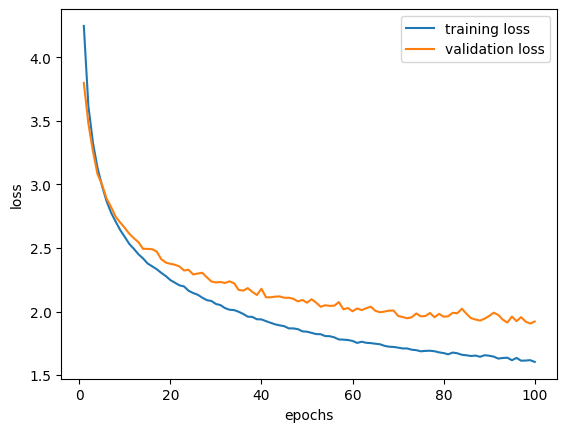

In [237]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [238]:
# report model accuracy on test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for idx, (inputs, labels) in enumerate(test_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

accuracy = 100 * correct / total
print(accuracy)

47.89953322960658


/var/folders/w_/ktm169bx72l270xpfjd5sljh0000gn/T/ipykernel_22239/2009560325.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [239]:
import random
r = random.randint(0, len(x_test)-1)
sample_x = x_test.iloc[r]
sample_y = y_test[r]
sample_x


user_id         43.000
Day              4.000
weekend          0.000
start_hour      15.000
end_hour        16.000
start_minute     3.000
end_minute      15.000
short_travel     0.000
origin lat      35.745
origin lon      51.465
origin label    83.000
Name: 3850, dtype: float64

83


In [240]:
# TODO: predict the destination of the above sample
# print out the prediction
sample_x_tensor = torch.tensor(sample_x.values, dtype=torch.float32)
sample_x_tensor = sample_x_tensor.reshape(1, -1)
with torch.no_grad():
    output = model(sample_x_tensor)
    _, prediction = torch.max(output, 1)
prediction.item()

107

In [241]:
# TODO: print out the actual destination of the above sample
print(sample_y)

107


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [242]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample
label_encoder_test.inverse_transform(prediction.numpy())[0]

'work-35.625-51.125'

**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...
نورال نتورک در مجموع برای داده های پیچیده تر بهتر است. با اضافه کردن لایه های بیشتر، نورال نتورک میتواند با دقت بالاتری برسد و از نظر پیچیدگی هم مشکلی نداشته باشد. ولی از طرفی پیاده سازی آن بسیار سخت تر از روش های قبلی است. همچنین بار محاسباتی بسیار بیشتری دارد. در نتیجه در مدل های ساده تر و با داده های کمتر بهتر است که از روش های قبلی مثل knn استفاده کرد.

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts: 
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage") 
   
2. Checking accuracies of your models on the test set. 

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).